In [359]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.dates as mdates
sns.set_style('whitegrid')
%matplotlib inline
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Dropout,GRU
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from tensorflow.keras import optimizers, Model
import matplotlib.pyplot as plt
import math

# Load Data

In [360]:
import os
CURR_FOLDER_PATH = os.getcwd()
BASE_PATH = os.path.dirname(os.path.dirname(CURR_FOLDER_PATH))
DATA_PATH = os.path.join(BASE_PATH, 'Lulus/data')

In [361]:
df = pd.read_excel(DATA_PATH + '/Hargalagpasartradisionallagvariable.xlsx')
# Data yang digunakan yaitu Harga cabai Rawit dan Harga Bawang putih sebagai Barang Subtitusi Sudah dilakukan lag - 1 Minggu

In [362]:
df

,Tanggal,Harga Cabai Merah,Harga Cabai Rawit
0,01/ 01/ 2018,-,-
1,08/ 01/ 2018,38300,-
2,15/ 01/ 2018,42800,42600
3,22/ 01/ 2018,37850,42700
4,29/ 01/ 2018,38950,42600
...,...,...,...
308,27/ 11/ 2023,80250,76600
309,04/ 12/ 2023,94900,79150
310,11/ 12/ 2023,99300,79100
311,18/ 12/ 2023,85000,75550


# Statistical Analytics

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Tanggal            313 non-null    object
 1   Harga Cabai Merah  313 non-null    object
 2   Harga Cabai Rawit  313 non-null    object
dtypes: object(3)
memory usage: 7.5+ KB


In [364]:
df.shape

(313, 3)

In [365]:
df.replace('-', pd.NA, inplace=True)

In [366]:
missing_values = df.isnull().sum()
percentage_missing = (missing_values / df.shape[0]) * 100
print("Jumlah Missing Value per Kolom:")
print(missing_values)
print("\nPersentase Missing Value per Kolom:")
percentage_missing

Jumlah Missing Value per Kolom:
Tanggal              0
Harga Cabai Merah    9
Harga Cabai Rawit    9
dtype: int64

Persentase Missing Value per Kolom:


Tanggal              0.000000
Harga Cabai Merah    2.875399
Harga Cabai Rawit    2.875399
dtype: float64

In [367]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d/ %m/ %Y')
df['Bulan'] = df['Tanggal'].dt.to_period('M')
mean_values = df.groupby('Bulan').mean()


def fill_missing_with_mean(row):
    if pd.isna(row['Harga Cabai Merah']):
        row['Harga Cabai Merah'] = mean_values.loc[row['Bulan'], 'Harga Cabai Merah']
    if pd.isna(row['Harga Cabai Rawit']):
        row['Harga Cabai Rawit'] = mean_values.loc[row['Bulan'], 'Harga Cabai Rawit']
    return row


df = df.apply(fill_missing_with_mean, axis=1)
print(df)

       Tanggal  Harga Cabai Merah  Harga Cabai Rawit    Bulan
0   2018-01-01       39475.000000       42633.333333  2018-01
1   2018-01-08       38300.000000       42633.333333  2018-01
2   2018-01-15       42800.000000       42600.000000  2018-01
3   2018-01-22       37850.000000       42700.000000  2018-01
4   2018-01-29       38950.000000       42600.000000  2018-01
..         ...                ...                ...      ...
308 2023-11-27       80250.000000       76600.000000  2023-11
309 2023-12-04       94900.000000       79150.000000  2023-12
310 2023-12-11       99300.000000       79100.000000  2023-12
311 2023-12-18       85000.000000       75550.000000  2023-12
312 2023-12-25       93066.666667       66350.000000  2023-12

[313 rows x 4 columns]


In [368]:
df['Harga Cabai Merah'] = df['Harga Cabai Merah'].astype('float64')
df['Harga Cabai Rawit'] = df['Harga Cabai Rawit'].astype('float64')

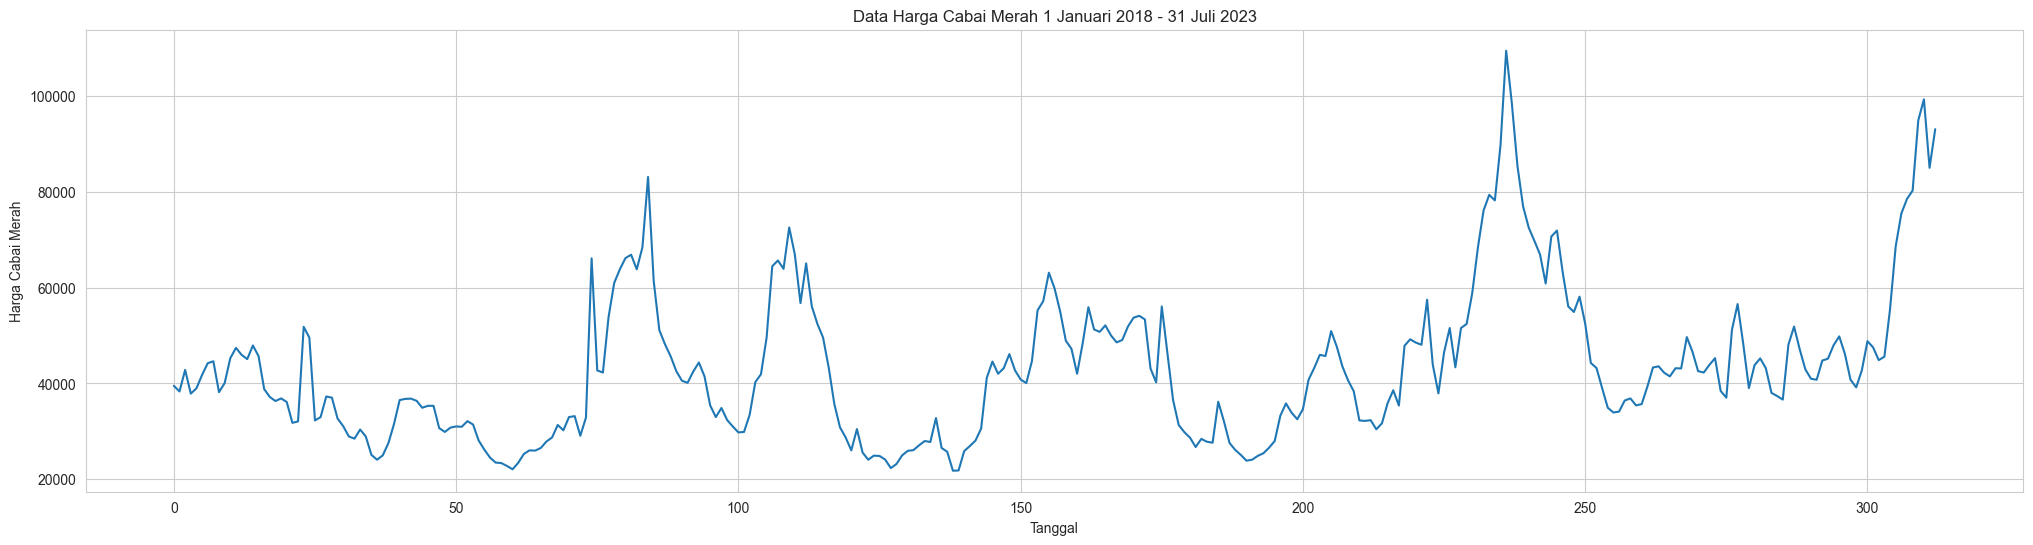

In [369]:
# Visualisasi
plt.figure(figsize=(25, 6))
plt.plot(df.index, df['Harga Cabai Merah'])
plt.title('Data Harga Cabai Merah 1 Januari 2018 - 31 Juli 2023')
plt.xlabel('Tanggal')
plt.ylabel('Harga Cabai Merah')
plt.show()

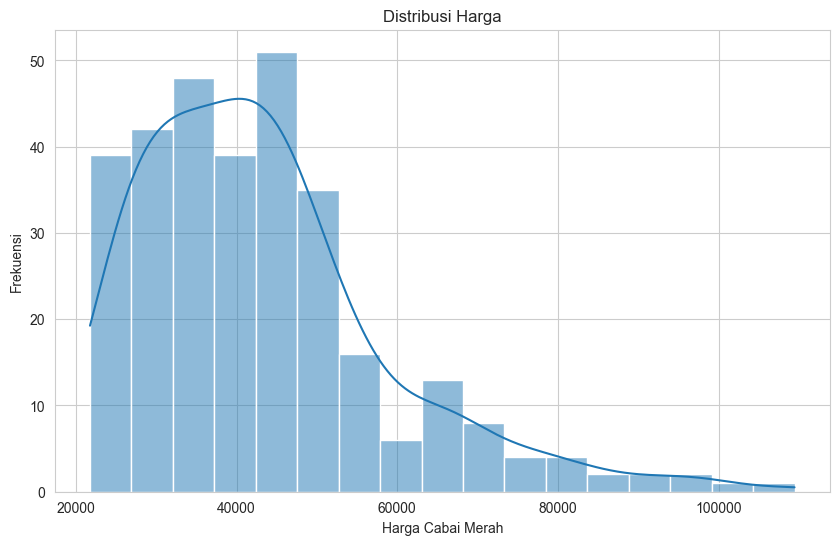

In [370]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Harga Cabai Merah'], kde=True)
plt.title('Distribusi Harga')
plt.xlabel('Harga Cabai Merah')
plt.ylabel('Frekuensi')
plt.show()

# Preprocessing Data


In [371]:
scaler_rr = MinMaxScaler(feature_range=(0, 1))
scaler_harga = MinMaxScaler(feature_range=(0, 1))
df['Harga Cabai Merah_Scaled'] = scaler_harga.fit_transform(df[['Harga Cabai Merah']])
df['Harga Cabai Rawit_Scaled'] = scaler_rr.fit_transform(df[['Harga Cabai Rawit']])

In [372]:
df.head()

,Tanggal,Harga Cabai Merah,Harga Cabai Rawit,Bulan,Harga Cabai Merah_Scaled,Harga Cabai Rawit_Scaled
0,2018-01-01,39475.0,42633.333333,2018-01,0.202109,0.256345
1,2018-01-08,38300.0,42633.333333,2018-01,0.188712,0.256345
2,2018-01-15,42800.0,42600.000000,2018-01,0.240023,0.255918
3,2018-01-22,37850.0,42700.000000,2018-01,0.183580,0.257198
4,2018-01-29,38950.0,42600.000000,2018-01,0.196123,0.255918


# Split Data

In [373]:
selected_columns = ['Harga Cabai Merah_Scaled']
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)][selected_columns].values
        dataX.append(a)
        dataY.append(dataset[i + look_back:i + look_back + 1]['Harga Cabai Merah_Scaled'].values)
    return np.array(dataX), np.array(dataY)

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], len(selected_columns)))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], len(selected_columns)))

# Pembuatan Model

In [374]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1), activation='relu'))
model.add(LSTM(units=64, activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=1)


Epoch 1/100


4/4 [==============================] - 3s 5ms/step - loss: 0.0809
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0768
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0728
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0689
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0649
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0611
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0570
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0527
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0489
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0445
Epoch 11/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0408
Epoch 12/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0368
Epoch 13/100
4/4 [==============================] - 0s 15ms/step - loss: 

In [375]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 1, 50)             10400     
                                                                 
 lstm_33 (LSTM)              (None, 64)                29440     
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [376]:
predictions = model.predict(testX)
predictions = scaler_harga.inverse_transform(predictions)
testY = scaler_harga.inverse_transform(testY)

2/2 [==============================] - 0s 5ms/step


In [377]:
trainY = scaler_harga.inverse_transform(trainY)

In [378]:
df_test = pd.DataFrame({'Actual': np.squeeze(testY), 'Predicted': np.squeeze(predictions)})
df_test.head(30)

,Actual,Predicted
0,44250.0,51157.359375
1,43200.0,43642.140625
2,39000.0,42653.988281
3,34900.0,38798.027344
4,33900.0,35179.242188
5,34100.0,34317.843750
6,36400.0,34489.464844
7,36850.0,36486.839844
8,35400.0,36882.777344
9,35650.0,35613.035156


In [379]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.set_index('Tanggal', inplace=True)
df.sort_index(inplace=True)
df.index = pd.to_datetime(df.index)

# Hasil Akhir

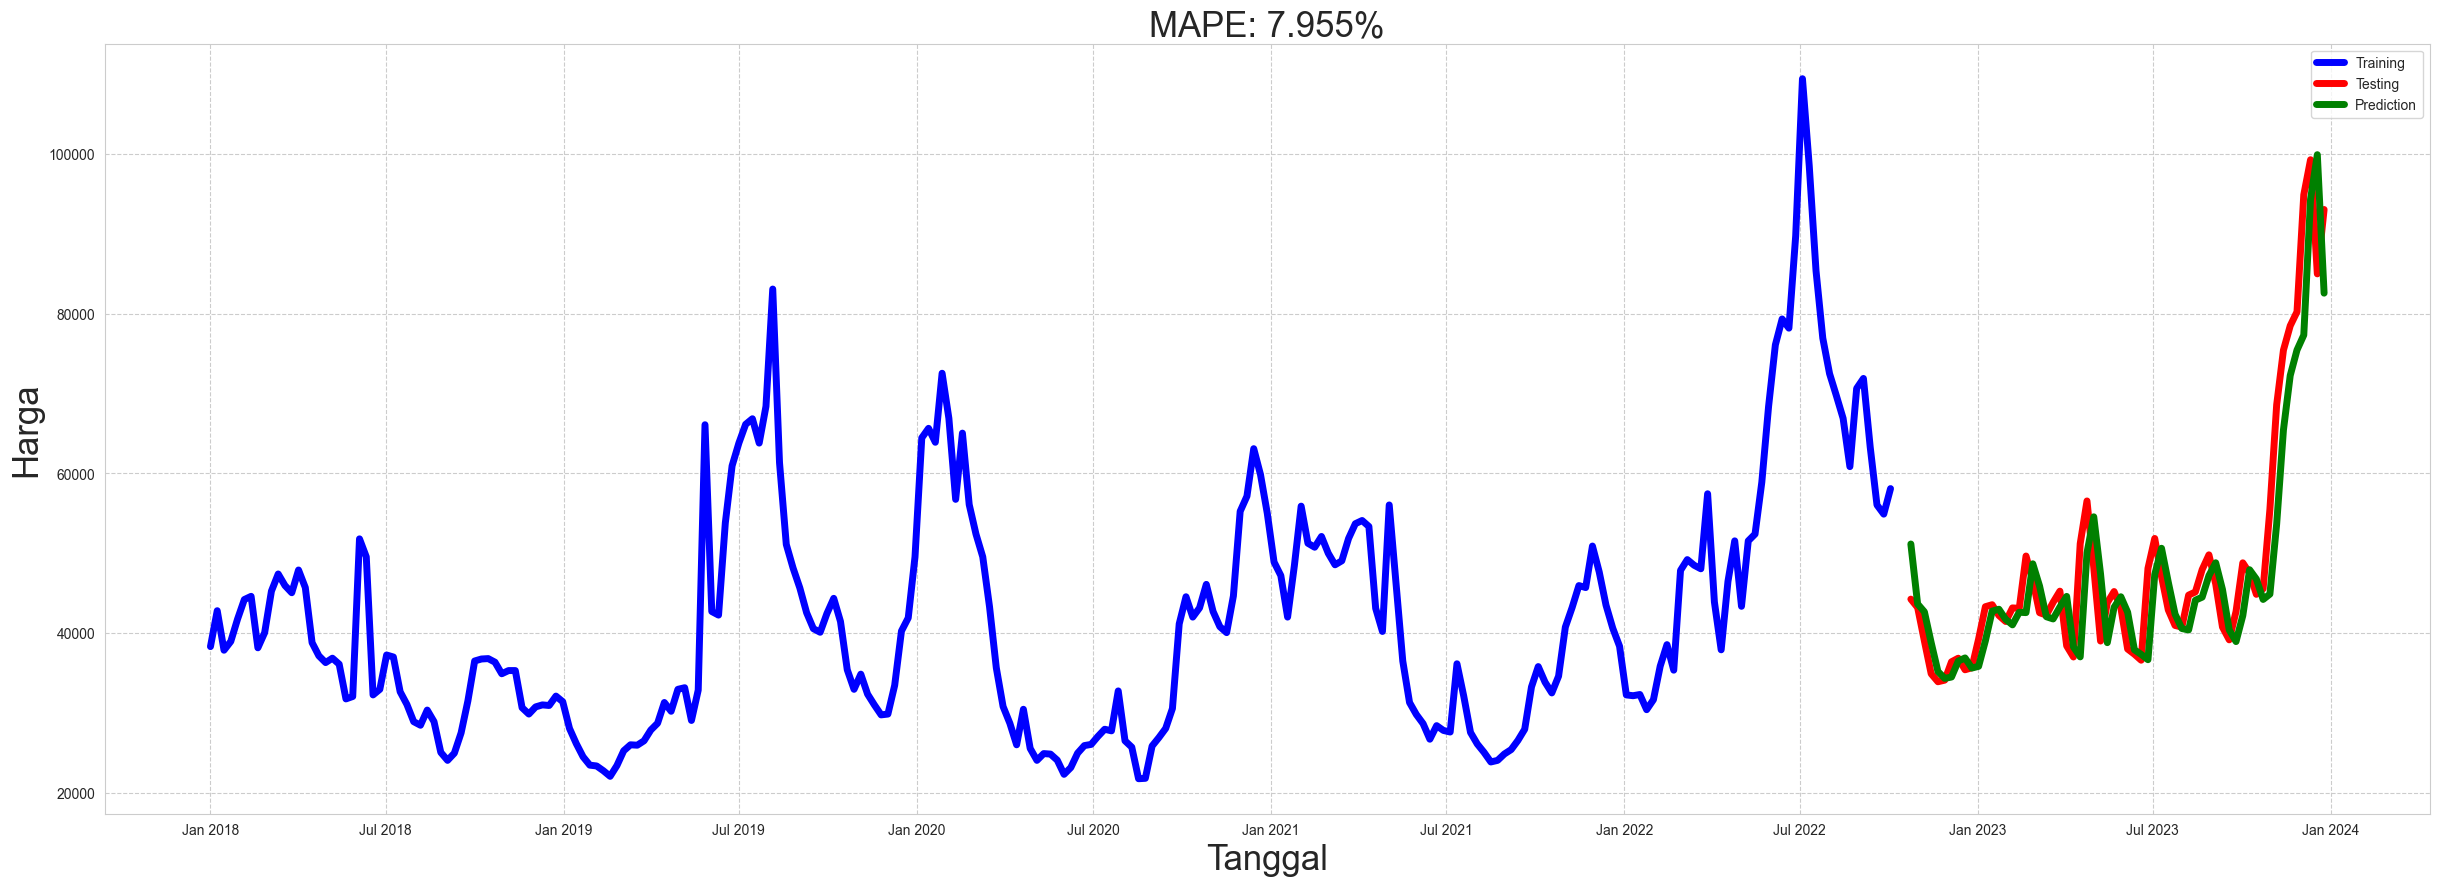

In [380]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from matplotlib.dates import MonthLocator, DateFormatter
mape = mean_absolute_percentage_error(testY, predictions)*100

plt.figure(figsize=(30, 10))
plt.plot(df.index[:len(trainY)], trainY, label='Training', marker='', color='blue', linestyle='-', linewidth=5)
plt.plot(df.index[-len(testY):], testY, label='Testing', marker='', color='red', linestyle='-', linewidth=5)
plt.plot(df.index[-len(predictions):], predictions, label='Prediction', marker='', color='green', linestyle='-', linewidth=5)
plt.title(f'MAPE: {mape:.3f}%', fontsize=25)
plt.xlabel('Tanggal', fontsize=25)
plt.ylabel('Harga', fontsize=25)
plt.grid(True, linestyle='--', alpha=1)
plt.legend()

locator = MonthLocator(bymonth=[1, 7])
formatter = DateFormatter('%b %Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=0)
plt.show()
